# Imports and set up

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SEED = 42

In [3]:
BIOPPYTHON_FEATURE_NAMES = [
    'molecular_weight',
    'aromaticity',
    'instability_index',
    'isoelectric_point',
    'helix_fraction',
    'turn_fraction',
    'sheet_fraction',
    'molar_extinction_coefficient_reduced',
    'molar_extinction_coefficient_oxidized',
    'gravy',
    'charge_at_ph'
]

# Load data

In [4]:
large_no_conc_basic_features = pd.read_csv('large_no_conc_basic_features.csv')
large_no_conc_preprocessed = pd.read_csv('large_no_conc_preprocessed.csv')

In [5]:
regresson_df = pd.concat(
    [large_no_conc_basic_features[BIOPPYTHON_FEATURE_NAMES + ['sequence_len']],
     large_no_conc_preprocessed.drop(columns=['Sequence']).set_index(large_no_conc_preprocessed.index)],
    axis=1, ignore_index=False
)
regresson_df

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Uptake,Units,Time,Temp.,Method,Type,new_uptake,nht_tail,acylated_terminal,cleaned_sequence
0,1339.6033,0.0,257.444444,11.999968,0.222222,0.0,0.0,0,0,-4.255556,...,650,Mean Fluorescence intensity,15.0,23.0,Flow cytometry,Cellular uptake,650.00,0,0,RKKRRQRRR
1,1183.4176,0.0,216.775000,11.999968,0.250000,0.0,0.0,0,0,-4.225000,...,31.25,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,31.25,0,0,RKKRRQRR
2,1027.2319,0.0,164.485714,11.999968,0.285714,0.0,0.0,0,0,-4.185714,...,10,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,10.00,0,0,RKKRRQR
3,1183.4176,0.0,288.375000,11.999968,0.250000,0.0,0.0,0,0,-4.225000,...,22.5,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,22.50,0,0,KKRRQRRR
4,1055.2453,0.0,328.142857,11.999968,0.142857,0.0,0.0,0,0,-4.271429,...,20,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,20.00,0,0,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1503.6867,0.0,143.320000,11.999968,0.000000,0.0,0.0,0,0,-3.980000,...,100,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,100.00,0,0,RRHRHRHRHR
1520,1659.8724,0.0,183.272727,11.999968,0.000000,0.0,0.0,0,0,-4.027273,...,250,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,250.00,0,0,RRRHRHRHRHR
1521,1816.0581,0.0,216.566667,11.999968,0.000000,0.0,0.0,0,0,-4.066667,...,400,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,400.00,0,0,RRRRHRHRHRHR
1522,1972.2438,0.0,244.738462,11.999968,0.000000,0.0,0.0,0,0,-4.100000,...,500,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,500.00,0,0,RRRRRHRHRHRHR


In [6]:
regresson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   molecular_weight                       1524 non-null   float64
 1   aromaticity                            1524 non-null   float64
 2   instability_index                      1524 non-null   float64
 3   isoelectric_point                      1524 non-null   float64
 4   helix_fraction                         1524 non-null   float64
 5   turn_fraction                          1524 non-null   float64
 6   sheet_fraction                         1524 non-null   float64
 7   molar_extinction_coefficient_reduced   1524 non-null   int64  
 8   molar_extinction_coefficient_oxidized  1524 non-null   int64  
 9   gravy                                  1524 non-null   float64
 10  charge_at_ph                           1524 non-null   float64
 11  sequ

# Explore categorical columns

In [7]:
regresson_df['Type'].value_counts()

Type
Cellular uptake                                      867
Uptake                                               360
Internalization                                       91
Penetration efficiencies                              55
Transfection                                          48
Translocation                                         27
Cell-Penetration                                      11
Transduction                                           8
Penetration                                            8
Cellular internalization of oleyl                      7
Internalization efficency                              6
CPP activity                                           6
Association                                            5
Internalization of fluorescently labeled peptides      4
QD internalization                                     4
Uptake (Endosomal escape)                              3
Live cell peptide uptake                               3
Cellular internalization  

In [8]:
regresson_df['Cargo'].value_counts()

Cargo
FITC                  292
Fluorescein           215
Carboxyfluorescein    121
QDs                    73
TAMRA                  67
                     ... 
CROP                    1
SLO                     1
CT-B                    1
Tf                      1
siRNA-A493              1
Name: count, Length: 133, dtype: int64

In [9]:
regresson_df['Cell line'].value_counts()

Cell line
HeLa cells                     364
MCF7 cells                      94
A549 cells                      92
CHO cells                       77
HEK293T cells                   70
                              ... 
C6 cells                         1
ZR-75-1 human breast cancer      1
S-180 sarcoma cells              1
M21                              1
MEF cells                        1
Name: count, Length: 122, dtype: int64

Применение у нашей потенциальной модели такое: дан пептид (скажем, синтезировали),а нам нужно выяснить, будет ли он проникатьв клетку. Параметры вроде Cargo и Type вряд ли даны, так как это информация из экспериментов, а смысл нашей модели как раз в том, чтобы не ставить эти эксперименты. Поэтому мы избавляемся от этих параметров.

In [10]:
regresson_df = regresson_df.drop(columns=['Cargo', 'Type', 'Method', 'Unnamed: 0'])

Также удалим другие колонки, которые больше не нужны

In [11]:
regresson_df = regresson_df.drop(columns=['Peptide', 'Uptake', 'Units', 'PubmedID'])

# Amino acids

In [12]:
def add_aa_percentages(df, aa_list, seq_col_name = 'sequence'):
    """
    Adds columns to the DataFrame with the percentage of each specified amino acid in the sequence.

    Parameters:
    df (pd.DataFrame): DataFrame containing the sequences.
    aa_list (list of str): List of amino acids to compute percentages for.

    Returns:
    pd.DataFrame: DataFrame with additional columns for each amino acid percentage.
    """
    for aa in aa_list:
        df[aa + '_percentage'] = df[seq_col_name].apply(lambda x: x.count(aa) / len(x) * 100 if len(x) > 0 else 0)
    return df

In [13]:
amino_acids = ['R', 'K', 'S', 'E']

In [14]:
regresson_df = add_aa_percentages(regresson_df, amino_acids, seq_col_name = 'cleaned_sequence')
regresson_df

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Time,Temp.,new_uptake,nht_tail,acylated_terminal,cleaned_sequence,R_percentage,K_percentage,S_percentage,E_percentage
0,1339.6033,0.0,257.444444,11.999968,0.222222,0.0,0.0,0,0,-4.255556,...,15.0,23.0,650.00,0,0,RKKRRQRRR,66.666667,22.222222,0.0,0.0
1,1183.4176,0.0,216.775000,11.999968,0.250000,0.0,0.0,0,0,-4.225000,...,10.0,23.0,31.25,0,0,RKKRRQRR,62.500000,25.000000,0.0,0.0
2,1027.2319,0.0,164.485714,11.999968,0.285714,0.0,0.0,0,0,-4.185714,...,10.0,23.0,10.00,0,0,RKKRRQR,57.142857,28.571429,0.0,0.0
3,1183.4176,0.0,288.375000,11.999968,0.250000,0.0,0.0,0,0,-4.225000,...,10.0,23.0,22.50,0,0,KKRRQRRR,62.500000,25.000000,0.0,0.0
4,1055.2453,0.0,328.142857,11.999968,0.142857,0.0,0.0,0,0,-4.271429,...,10.0,23.0,20.00,0,0,KRRQRRR,71.428571,14.285714,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1503.6867,0.0,143.320000,11.999968,0.000000,0.0,0.0,0,0,-3.980000,...,1440.0,37.0,100.00,0,0,RRHRHRHRHR,60.000000,0.000000,0.0,0.0
1520,1659.8724,0.0,183.272727,11.999968,0.000000,0.0,0.0,0,0,-4.027273,...,1440.0,37.0,250.00,0,0,RRRHRHRHRHR,63.636364,0.000000,0.0,0.0
1521,1816.0581,0.0,216.566667,11.999968,0.000000,0.0,0.0,0,0,-4.066667,...,1440.0,37.0,400.00,0,0,RRRRHRHRHRHR,66.666667,0.000000,0.0,0.0
1522,1972.2438,0.0,244.738462,11.999968,0.000000,0.0,0.0,0,0,-4.100000,...,1440.0,37.0,500.00,0,0,RRRRRHRHRHRHR,69.230769,0.000000,0.0,0.0


In [15]:
regresson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   molecular_weight                       1524 non-null   float64
 1   aromaticity                            1524 non-null   float64
 2   instability_index                      1524 non-null   float64
 3   isoelectric_point                      1524 non-null   float64
 4   helix_fraction                         1524 non-null   float64
 5   turn_fraction                          1524 non-null   float64
 6   sheet_fraction                         1524 non-null   float64
 7   molar_extinction_coefficient_reduced   1524 non-null   int64  
 8   molar_extinction_coefficient_oxidized  1524 non-null   int64  
 9   gravy                                  1524 non-null   float64
 10  charge_at_ph                           1524 non-null   float64
 11  sequ

# Numerical features distribution

In [16]:
def plot_numerical_columns(df):
    # Get list of numerical columns
    numerical_columns = df.select_dtypes(include=['float64']).columns
    
    for column in numerical_columns:
        # Create a new figure for each column
        plt.figure(figsize=(15, 5))

        # Boxen plot
        plt.subplot(1, 3, 1)
        sns.boxenplot(data=df, x=column)
        plt.title(f'Boxen Plot of {column}')
        
        # KDE plot
        plt.subplot(1, 3, 2)
        sns.kdeplot(data=df, x=column, fill=True)
        plt.title(f'KDE Plot of {column}')
        
        # QQ plot
        plt.subplot(1, 3, 3)
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title(f'QQ Plot of {column}')
        
        # Adjust layout
        plt.tight_layout()
        
        # Show the plots
        plt.show()

У многих величин есть "хвосты", возможно, это проблемные данные. Пока что сделаем максимально достоверный датасет, удалив их.

Перед удалением хвостов прологарифмируем Uptake. Это обосновывается видом распределения, а также тем, что на сайте базы POSEIDON [используется](http://www.moreiralab.com/resources/poseidon/) логарифмическая шкала, и логарифмированный Uptake распределен нормально. Придётся удалить нули, так как. В итоговом пайплайне мы планируем сначала прогонять данный через классификатор, и затем, если пептид является CPP, предсказывать ненулевой Uptake регрессионной моделью, поэтому такое удаление корректно.

In [17]:
len(regresson_df[regresson_df['new_uptake'] == 0])

32

In [18]:
regresson_df = regresson_df[regresson_df['new_uptake'] != 0]

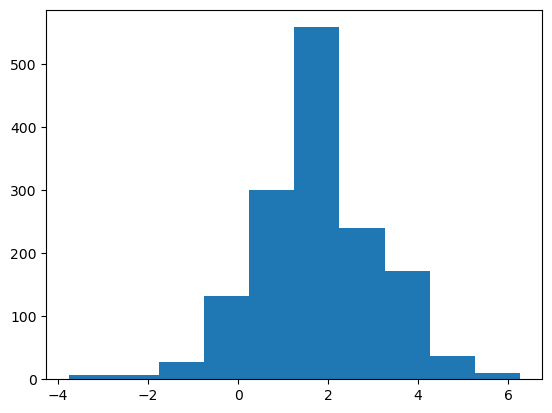

In [19]:
plt.hist(np.log10(regresson_df.new_uptake))
plt.show()

In [20]:
regresson_df['new_uptake'] = np.log10(regresson_df.new_uptake)

/tmp/ipykernel_344004/2531172442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regresson_df['new_uptake'] = np.log10(regresson_df.new_uptake)


In [21]:
# We will trim some outliers by hands
regresson_df[regresson_df['Time'] > 2500]

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Time,Temp.,new_uptake,nht_tail,acylated_terminal,cleaned_sequence,R_percentage,K_percentage,S_percentage,E_percentage
297,2684.1597,0.041667,17.608333,11.999968,0.666667,0.000000,0.25000,5500,5500,0.100000,...,2880.0,37.0,1.755875,0,0,WEARLARALARALARHLARALARA,25.0,0.000000,0.000000,4.166667
298,2684.1597,0.041667,17.608333,11.999968,0.666667,0.000000,0.25000,5500,5500,0.100000,...,2880.0,37.0,1.431364,0,0,WEARLARALARALARHLARALARA,25.0,0.000000,0.000000,4.166667
394,2486.6883,0.142857,-24.114286,4.723968,0.190476,0.238095,0.47619,6990,6990,-0.514286,...,2880.0,37.0,1.547775,0,0,VTPHHVLVDEYTGEWVDSQFK,0.0,4.761905,4.761905,9.523810
395,2486.6883,0.142857,-24.114286,4.723968,0.190476,0.238095,0.47619,6990,6990,-0.514286,...,2880.0,37.0,1.641474,0,0,VTPHHVLVDEYTGEWVDSQFK,0.0,4.761905,4.761905,9.523810
396,2486.6883,0.142857,-24.114286,4.723968,0.190476,0.238095,0.47619,6990,6990,-0.514286,...,2880.0,37.0,1.510545,0,0,VTPHHVLVDEYTGEWVDSQFK,0.0,4.761905,4.761905,9.523810
397,2486.6883,0.142857,-24.114286,4.723968,0.190476,0.238095,0.47619,6990,6990,-0.514286,...,2880.0,37.0,1.424882,0,0,VTPHHVLVDEYTGEWVDSQFK,0.0,4.761905,4.761905,9.523810


In [22]:
regresson_df = regresson_df[~(regresson_df['Time'] > 2500)]

In [23]:
regresson_df[regresson_df['Temp.'] > 40]

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Time,Temp.,new_uptake,nht_tail,acylated_terminal,cleaned_sequence,R_percentage,K_percentage,S_percentage,E_percentage
1228,10656.1464,0.042553,66.896809,11.600522,0.287234,0.202128,0.265957,2980,3105,-0.701064,...,60.0,42.0,1.568202,0,0,RGGRLSYSRRRFSTSTGRVPGVVVVVGGGAAGLPRHSAVMERLRRR...,19.148936,3.191489,7.446809,7.446809
1230,10914.2950,0.040000,68.419000,11.600522,0.330000,0.230000,0.210000,2980,3105,-0.735000,...,60.0,42.0,0.903090,0,0,RGGRLSYSRRRFSTSTGRVPGVGGGGGGGAAAAAAAAGLPRHSAVM...,18.000000,3.000000,7.000000,7.000000
1232,10656.1464,0.042553,66.896809,11.600522,0.287234,0.202128,0.265957,2980,3105,-0.701064,...,60.0,42.0,1.380211,0,0,RGGRLSYSRRRFSTSTGRVPGVVVVVGGGAAGLPRHSAVMERLRRR...,19.148936,3.191489,7.446809,7.446809
1234,10914.2950,0.040000,68.419000,11.600522,0.330000,0.230000,0.210000,2980,3105,-0.735000,...,60.0,42.0,1.000000,0,0,RGGRLSYSRRRFSTSTGRVPGVGGGGGGGAAAAAAAAGLPRHSAVM...,18.000000,3.000000,7.000000,7.000000


In [24]:
regresson_df = regresson_df[~(regresson_df['Temp.'] > 40)]

In [25]:
regresson_df[regresson_df['molecular_weight'] > 6000]

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Time,Temp.,new_uptake,nht_tail,acylated_terminal,cleaned_sequence,R_percentage,K_percentage,S_percentage,E_percentage
708,8977.0476,0.071429,22.382143,9.155558,0.357143,0.250000,0.214286,4470,4845,-0.685714,...,120.0,37.0,2.041393,0,0,EKPYKCPECGKSFSASAALVAHQRTHTGEKPYKCPECGKSFSASAA...,3.571429,10.714286,10.714286,7.142857
709,8977.0476,0.071429,22.382143,9.155558,0.357143,0.250000,0.214286,4470,4845,-0.685714,...,120.0,37.0,2.079181,0,0,EKPYKCPECGKSFSASAALVAHQRTHTGEKPYKCPECGKSFSASAA...,3.571429,10.714286,10.714286,7.142857
710,8977.0476,0.071429,22.382143,9.155558,0.357143,0.250000,0.214286,4470,4845,-0.685714,...,120.0,37.0,2.249198,0,0,EKPYKCPECGKSFSASAALVAHQRTHTGEKPYKCPECGKSFSASAA...,3.571429,10.714286,10.714286,7.142857
1227,10656.1464,0.042553,66.896809,11.600522,0.287234,0.202128,0.265957,2980,3105,-0.701064,...,60.0,37.0,0.954243,0,0,RGGRLSYSRRRFSTSTGRVPGVVVVVGGGAAGLPRHSAVMERLRRR...,19.148936,3.191489,7.446809,7.446809
1229,10914.2950,0.040000,68.419000,11.600522,0.330000,0.230000,0.210000,2980,3105,-0.735000,...,60.0,37.0,0.698970,0,0,RGGRLSYSRRRFSTSTGRVPGVGGGGGGGAAAAAAAAGLPRHSAVM...,18.000000,3.000000,7.000000,7.000000
1231,10656.1464,0.042553,66.896809,11.600522,0.287234,0.202128,0.265957,2980,3105,-0.701064,...,60.0,37.0,0.903090,0,0,RGGRLSYSRRRFSTSTGRVPGVVVVVGGGAAGLPRHSAVMERLRRR...,19.148936,3.191489,7.446809,7.446809
1233,10914.2950,0.040000,68.419000,11.600522,0.330000,0.230000,0.210000,2980,3105,-0.735000,...,60.0,37.0,0.845098,0,0,RGGRLSYSRRRFSTSTGRVPGVGGGGGGGAAAAAAAAGLPRHSAVM...,18.000000,3.000000,7.000000,7.000000


In [26]:
regresson_df = regresson_df[~(regresson_df['molecular_weight'] > 6000)]

In [27]:
regresson_df[regresson_df['turn_fraction'] > 0.8]

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Time,Temp.,new_uptake,nht_tail,acylated_terminal,cleaned_sequence,R_percentage,K_percentage,S_percentage,E_percentage
1116,1474.7433,0.0,189.093333,5.954987,0.0,1.0,0.0,0,0,-1.6,...,120.0,26.0,2.204120,0,0,PPPPPPPPPPPPPPP,0.0,0.0,0.0,0.0
1117,1474.7433,0.0,189.093333,5.954987,0.0,1.0,0.0,0,0,-1.6,...,120.0,26.0,2.301030,0,0,PPPPPPPPPPPPPPP,0.0,0.0,0.0,0.0
1118,1571.8585,0.0,189.937500,5.954987,0.0,1.0,0.0,0,0,-1.6,...,120.0,26.0,2.230449,0,0,PPPPPPPPPPPPPPPP,0.0,0.0,0.0,0.0
1119,1571.8585,0.0,189.937500,5.954987,0.0,1.0,0.0,0,0,-1.6,...,120.0,26.0,2.255273,0,0,PPPPPPPPPPPPPPPP,0.0,0.0,0.0,0.0
1122,1474.7433,0.0,189.093333,5.954987,0.0,1.0,0.0,0,0,-1.6,...,240.0,26.0,2.217484,0,0,PPPPPPPPPPPPPPP,0.0,0.0,0.0,0.0
1123,1474.7433,0.0,189.093333,5.954987,0.0,1.0,0.0,0,0,-1.6,...,240.0,26.0,2.397940,0,0,PPPPPPPPPPPPPPP,0.0,0.0,0.0,0.0
1124,1571.8585,0.0,189.937500,5.954987,0.0,1.0,0.0,0,0,-1.6,...,240.0,26.0,2.204120,0,0,PPPPPPPPPPPPPPPP,0.0,0.0,0.0,0.0
1125,1571.8585,0.0,189.937500,5.954987,0.0,1.0,0.0,0,0,-1.6,...,240.0,26.0,2.322219,0,0,PPPPPPPPPPPPPPPP,0.0,0.0,0.0,0.0


In [28]:
regresson_df = regresson_df[~(regresson_df['turn_fraction'] > 0.8)]

In [29]:
regresson_df[(regresson_df['Temp.'] < 10)]

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Time,Temp.,new_uptake,nht_tail,acylated_terminal,cleaned_sequence,R_percentage,K_percentage,S_percentage,E_percentage
33,2246.7274,0.187500,46.600000,11.999968,0.312500,0.062500,0.312500,11000,11000,-1.731250,...,120.0,4.0,-0.619789,0,0,RQIKIWFQNRRMKWKK,18.750000,25.000000,0.000000,0.000000
34,2246.7274,0.187500,48.512500,11.999968,0.312500,0.062500,0.312500,11000,11000,-1.731250,...,120.0,4.0,-0.585027,0,0,KKWKMRRNQFWIKIQR,18.750000,25.000000,0.000000,0.000000
35,2215.7134,0.187500,58.637500,11.999968,0.312500,0.125000,0.312500,11000,11000,-1.612500,...,120.0,4.0,-0.055517,0,0,RQIKIWFPNRRMKWKK,18.750000,25.000000,0.000000,0.000000
36,2165.5902,0.187500,69.468750,11.999968,0.250000,0.250000,0.250000,11000,11000,-2.212500,...,120.0,4.0,-0.744727,0,0,RQPKIWFPNRRKPWKK,18.750000,25.000000,0.000000,0.000000
967,1396.6546,0.000000,232.700000,11.999968,0.200000,0.100000,0.000000,0,0,-3.870000,...,60.0,4.0,0.903090,0,0,GRKKRRQRRR,60.000000,20.000000,0.000000,0.000000
968,1396.6546,0.000000,232.700000,11.999968,0.200000,0.100000,0.000000,0,0,-3.870000,...,60.0,4.0,0.845098,0,0,GRKKRRQRRR,60.000000,20.000000,0.000000,0.000000
969,1396.6546,0.000000,232.700000,11.999968,0.200000,0.100000,0.000000,0,0,-3.870000,...,60.0,4.0,1.505150,0,0,GRKKRRQRRR,60.000000,20.000000,0.000000,0.000000
970,1396.6546,0.000000,232.700000,11.999968,0.200000,0.100000,0.000000,0,0,-3.870000,...,60.0,4.0,1.447158,0,0,GRKKRRQRRR,60.000000,20.000000,0.000000,0.000000
971,1396.6546,0.000000,232.700000,11.999968,0.200000,0.100000,0.000000,0,0,-3.870000,...,60.0,4.0,0.845098,0,0,GRKKRRQRRR,60.000000,20.000000,0.000000,0.000000
972,1396.6546,0.000000,232.700000,11.999968,0.200000,0.100000,0.000000,0,0,-3.870000,...,60.0,4.0,1.079181,0,0,GRKKRRQRRR,60.000000,20.000000,0.000000,0.000000


In [30]:
regresson_df = regresson_df[~(regresson_df['Temp.'] < 10)]

In [31]:
regresson_df[(regresson_df['K_percentage'] > 70)]

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Time,Temp.,new_uptake,nht_tail,acylated_terminal,cleaned_sequence,R_percentage,K_percentage,S_percentage,E_percentage
638,1171.5660,0.0,8.888889,10.903296,1.0,0.0,0.0,0,0,-3.9,...,960.0,37.0,4.860338,0,0,KKKKKKKKK,0.0,100.0,0.0,0.0
657,1171.5660,0.0,8.888889,10.903296,1.0,0.0,0.0,0,0,-3.9,...,960.0,37.0,3.954243,0,0,KKKKKKKKK,0.0,100.0,0.0,0.0
1357,1171.5660,0.0,8.888889,10.903296,1.0,0.0,0.0,0,0,-3.9,...,30.0,37.0,-0.154902,0,0,KKKKKKKKK,0.0,100.0,0.0,0.0
1358,1171.5660,0.0,8.888889,10.903296,1.0,0.0,0.0,0,0,-3.9,...,60.0,37.0,0.113943,0,0,KKKKKKKKK,0.0,100.0,0.0,0.0
1359,1171.5660,0.0,8.888889,10.903296,1.0,0.0,0.0,0,0,-3.9,...,240.0,37.0,0.146128,0,0,KKKKKKKKK,0.0,100.0,0.0,0.0
1360,1171.5660,0.0,8.888889,10.903296,1.0,0.0,0.0,0,0,-3.9,...,720.0,37.0,0.255273,0,0,KKKKKKKKK,0.0,100.0,0.0,0.0
1361,1171.5660,0.0,8.888889,10.903296,1.0,0.0,0.0,0,0,-3.9,...,1440.0,37.0,0.204120,0,0,KKKKKKKKK,0.0,100.0,0.0,0.0
1491,1299.7383,0.0,9.000000,10.954420,1.0,0.0,0.0,0,0,-3.9,...,90.0,37.0,1.875061,1,0,KKKKKKKKKK,0.0,100.0,0.0,0.0


In [32]:
regresson_df[(regresson_df['S_percentage'] > 25)]

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Time,Temp.,new_uptake,nht_tail,acylated_terminal,cleaned_sequence,R_percentage,K_percentage,S_percentage,E_percentage
89,1348.5553,0.200,162.080000,11.999968,0.300000,0.300000,0.200000,11000,11000,-2.490000,...,1080.0,37.0,2.285557,0,0,SRWRWKSSKK,20.000000,30.000000,30.000000,0.000000
585,2117.4137,0.000,101.978947,11.754279,0.421053,0.368421,0.052632,0,0,-1.847368,...,120.0,37.0,1.000000,0,0,RKRRESASSSSSVKKAKKP,15.789474,26.315789,31.578947,5.263158
597,2117.4137,0.000,101.978947,11.754279,0.421053,0.368421,0.052632,0,0,-1.847368,...,120.0,37.0,1.342423,0,0,RKRRESASSSSSVKKAKKP,15.789474,26.315789,31.578947,5.263158
609,2117.4137,0.000,101.978947,11.754279,0.421053,0.368421,0.052632,0,0,-1.847368,...,120.0,37.0,1.505150,0,0,RKRRESASSSSSVKKAKKP,15.789474,26.315789,31.578947,5.263158
1449,977.0671,0.000,91.077778,4.370259,0.333333,0.444444,0.333333,0,0,-0.088889,...,180.0,37.0,-1.698970,0,0,KLSSIESDV,0.000000,11.111111,33.333333,11.111111
1480,2488.5752,0.125,115.958333,9.696641,0.083333,0.625000,0.250000,4470,4470,-0.470833,...,720.0,37.0,1.230449,0,0,YSSYSAPVSSSLSVRRSYSSSSGS,8.333333,0.000000,54.166667,0.000000


In [33]:
regresson_df[(regresson_df['E_percentage'] > 30)]

,molecular_weight,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,...,Time,Temp.,new_uptake,nht_tail,acylated_terminal,cleaned_sequence,R_percentage,K_percentage,S_percentage,E_percentage
208,405.3573,0.000000,224.000000,4.050028,1.000000,0.000000,0.000000,0,0,-3.500000,...,240.0,37.0,2.146128,0,0,EEE,0.000000,0.000000,0.0,100.000000
209,547.5131,0.000000,138.400000,4.050028,1.000000,0.000000,0.000000,0,0,-1.380000,...,240.0,37.0,2.079181,0,0,EEEAA,0.000000,0.000000,0.0,60.000000
210,932.0300,0.000000,90.250000,6.325293,1.000000,0.000000,0.000000,0,0,-2.325000,...,240.0,37.0,2.447158,0,0,EEEAAKKK,0.000000,37.500000,0.0,37.500000
354,2923.1264,0.000000,296.852174,6.542759,0.478261,0.173913,0.086957,0,0,-2.630435,...,60.0,37.0,1.929419,0,0,EEEEEEEEPLGLAGRRRRRRRRN,34.782609,0.000000,0.0,34.782609
355,2923.1264,0.000000,296.852174,6.542759,0.478261,0.173913,0.086957,0,0,-2.630435,...,60.0,37.0,1.934498,0,0,EEEEEEEEPLGLAGRRRRRRRRN,34.782609,0.000000,0.0,34.782609
356,2923.1264,0.000000,296.852174,6.542759,0.478261,0.173913,0.086957,0,0,-2.630435,...,60.0,37.0,0.982271,0,0,EEEEEEEEPLGLAGRRRRRRRRN,34.782609,0.000000,0.0,34.782609
357,2923.1264,0.000000,296.852174,6.542759,0.478261,0.173913,0.086957,0,0,-2.630435,...,60.0,37.0,1.982271,0,0,EEEEEEEEPLGLAGRRRRRRRRN,34.782609,0.000000,0.0,34.782609
391,5316.4117,0.047619,58.747619,6.157391,0.357143,0.142857,0.047619,1490,1490,-2.930952,...,60.0,37.0,2.514548,0,0,HEHEHEHEHEHEHEHEHEHEHEHEEFGGGGGYGRKKRRQRRR,14.285714,4.761905,0.0,30.952381
1474,2015.1132,0.000000,394.485714,6.468755,0.500000,0.000000,0.000000,0,0,-4.000000,...,10.0,37.0,1.602060,0,0,RRRRRRREEEEEEE,50.000000,0.000000,0.0,50.000000
1475,2015.1132,0.000000,394.485714,6.468755,0.500000,0.000000,0.000000,0,0,-4.000000,...,10.0,37.0,2.204120,0,0,RRRRRRREEEEEEE,50.000000,0.000000,0.0,50.000000


**Не будем обрезать по процентам аминокислот, так как данные выглядят достоверно и не слишком странно**

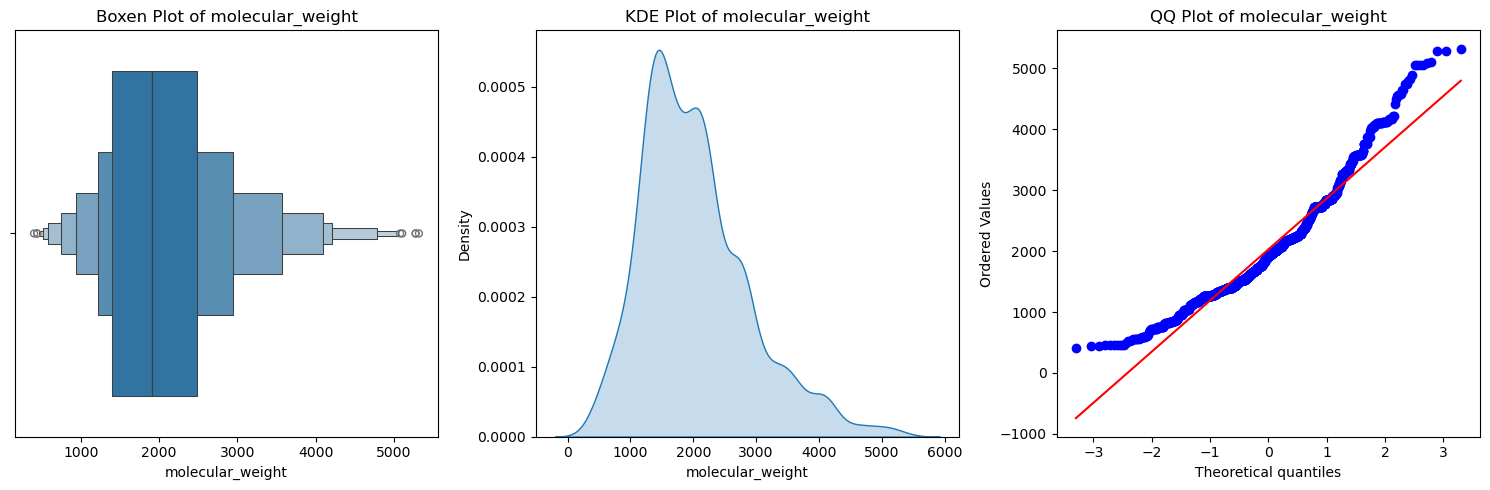

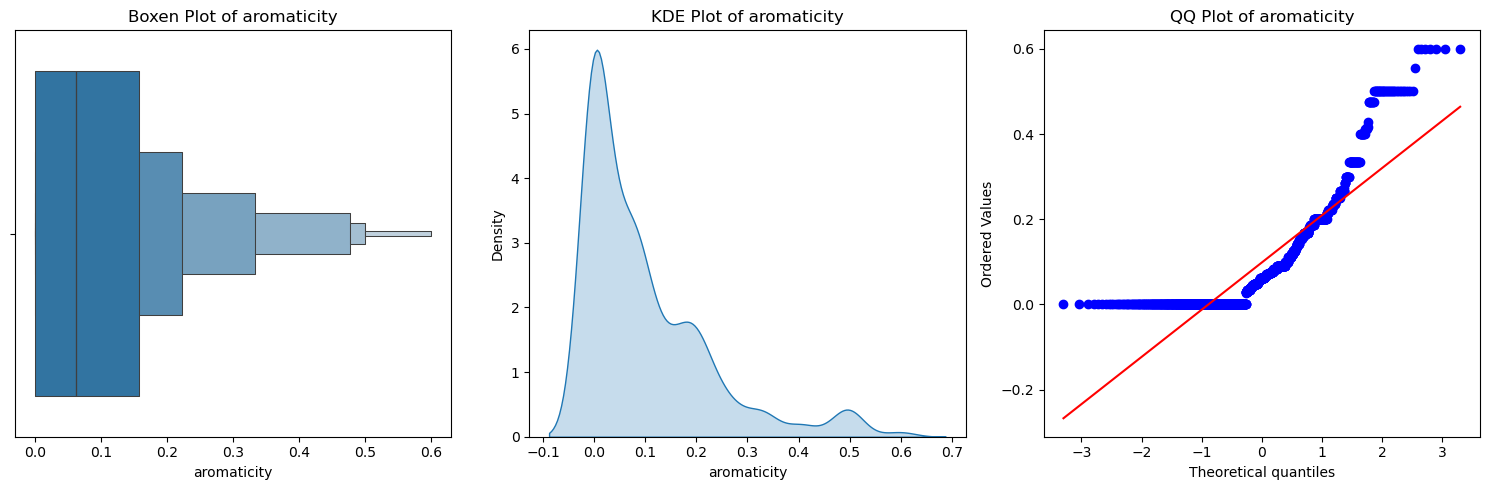

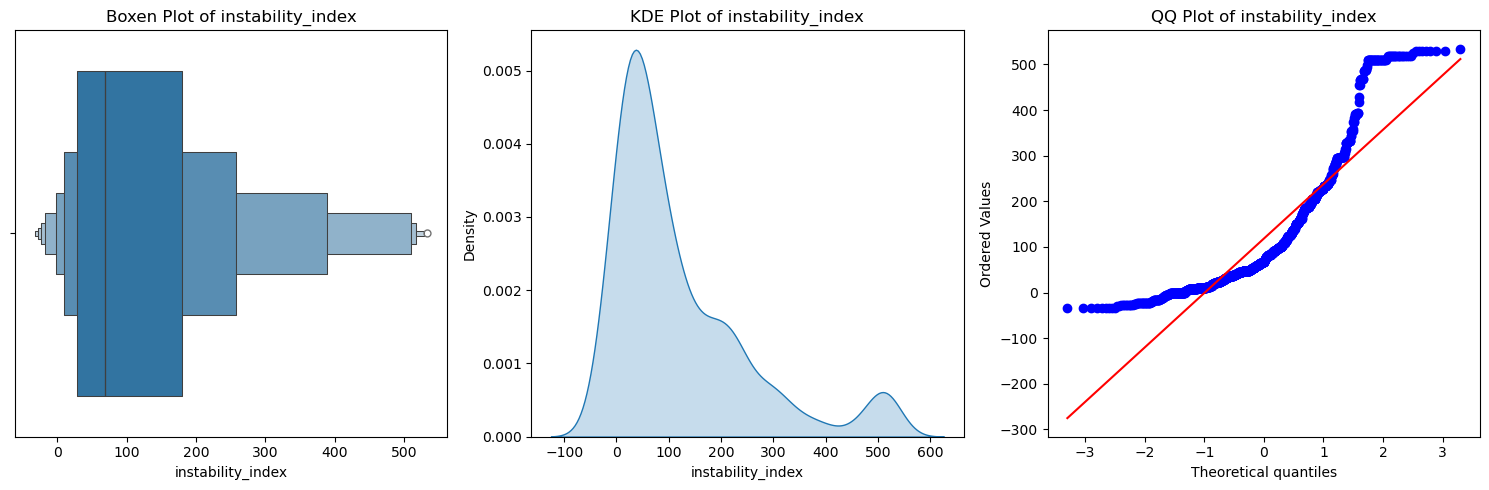

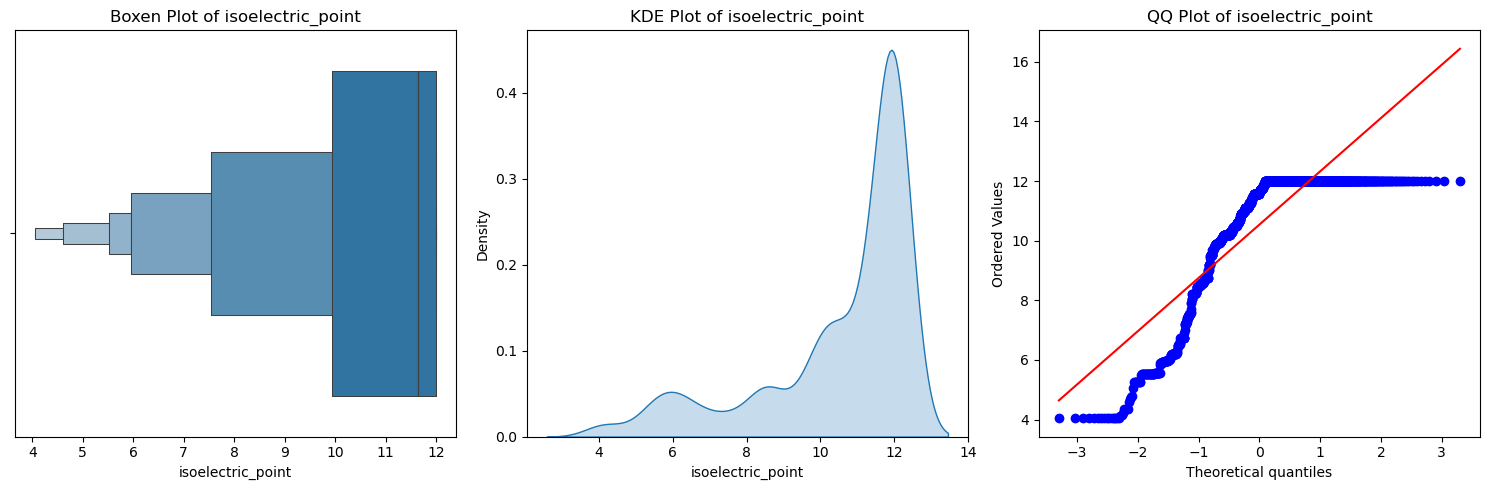

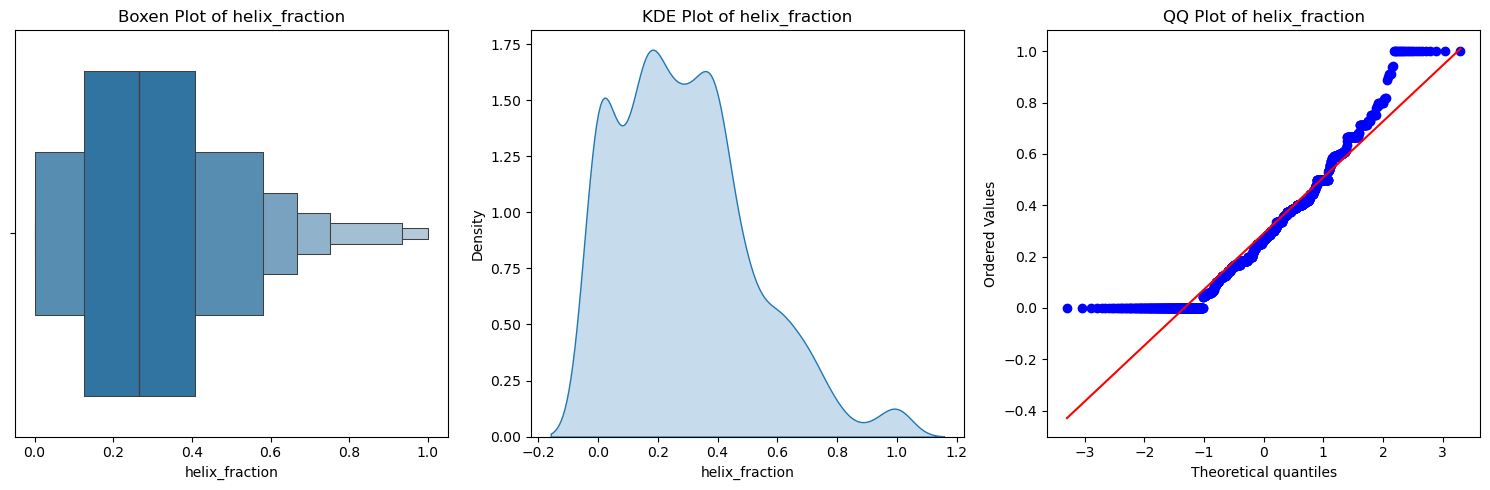

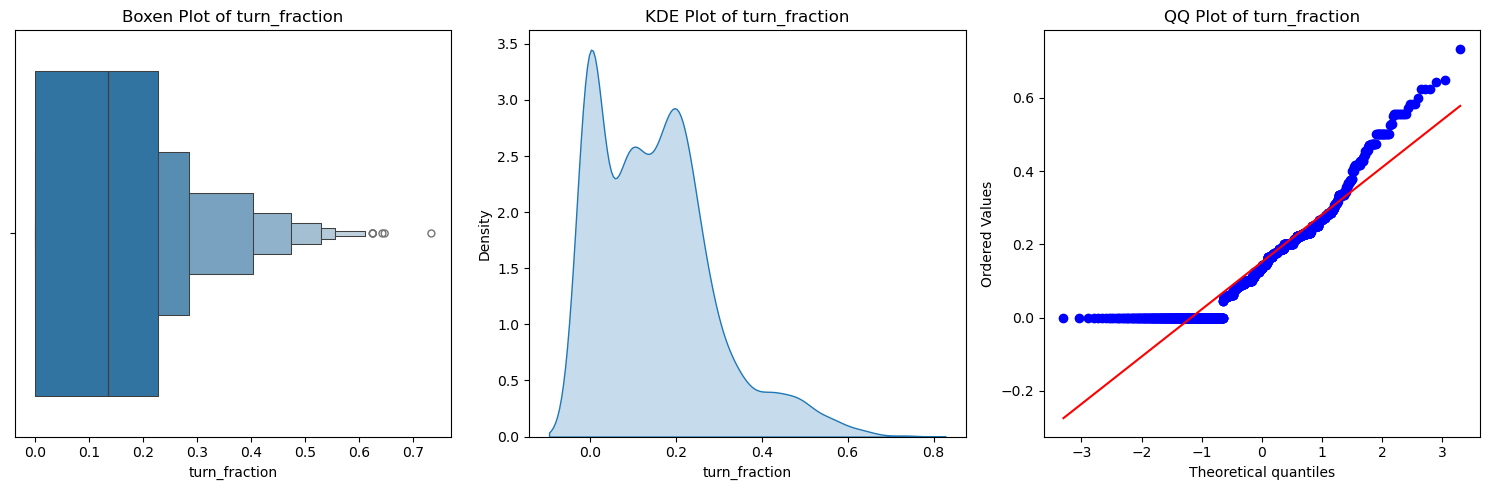

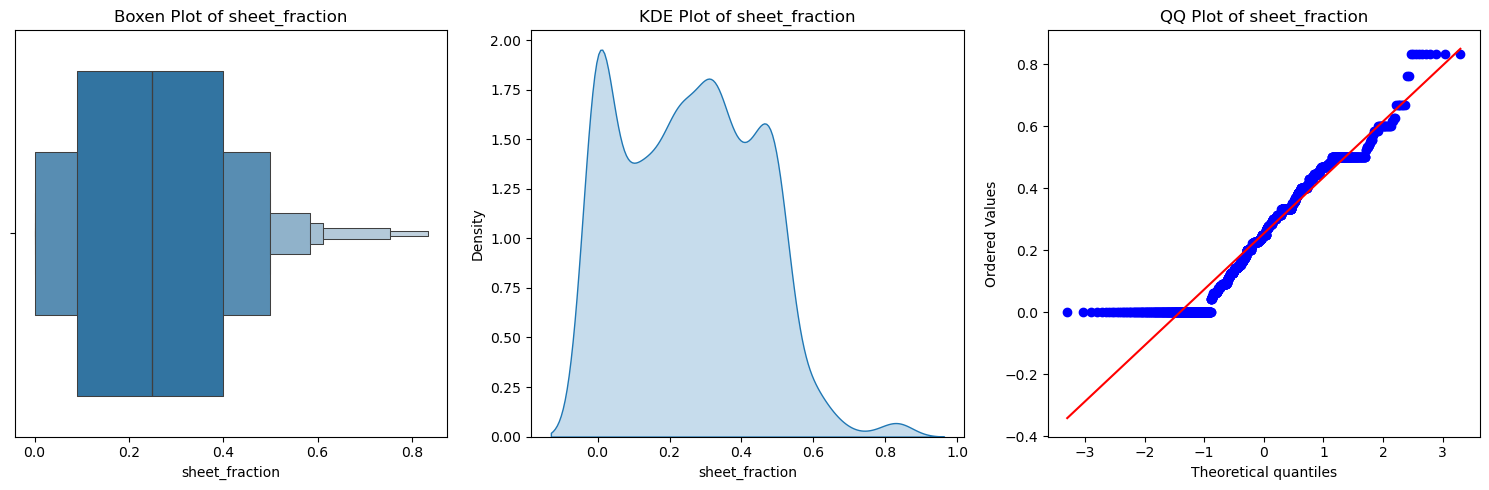

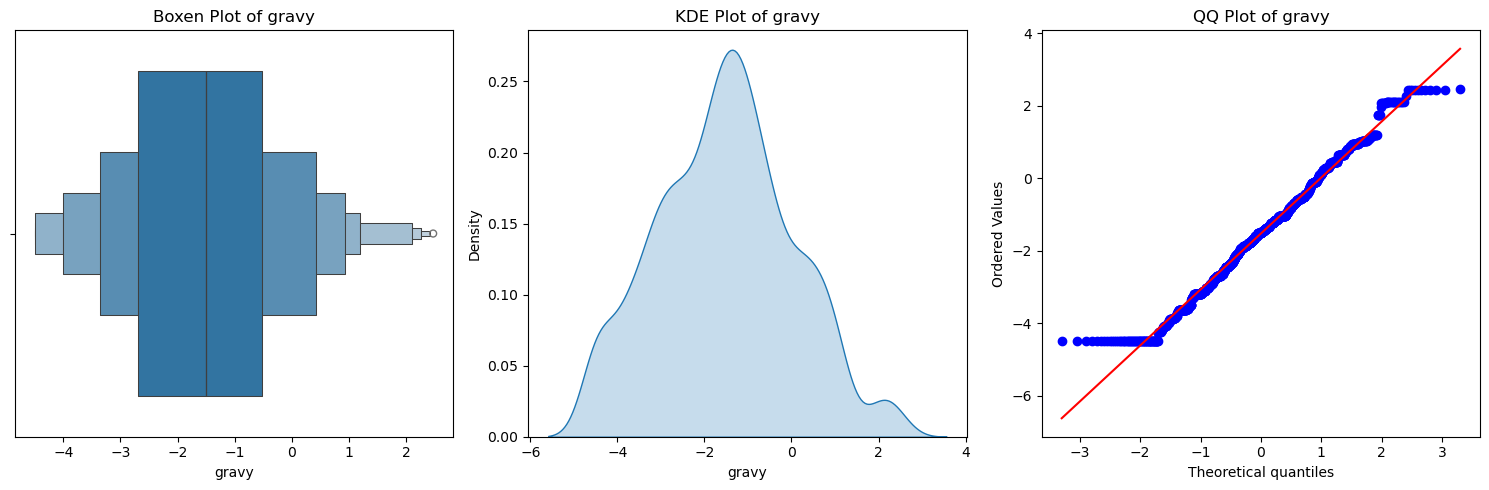

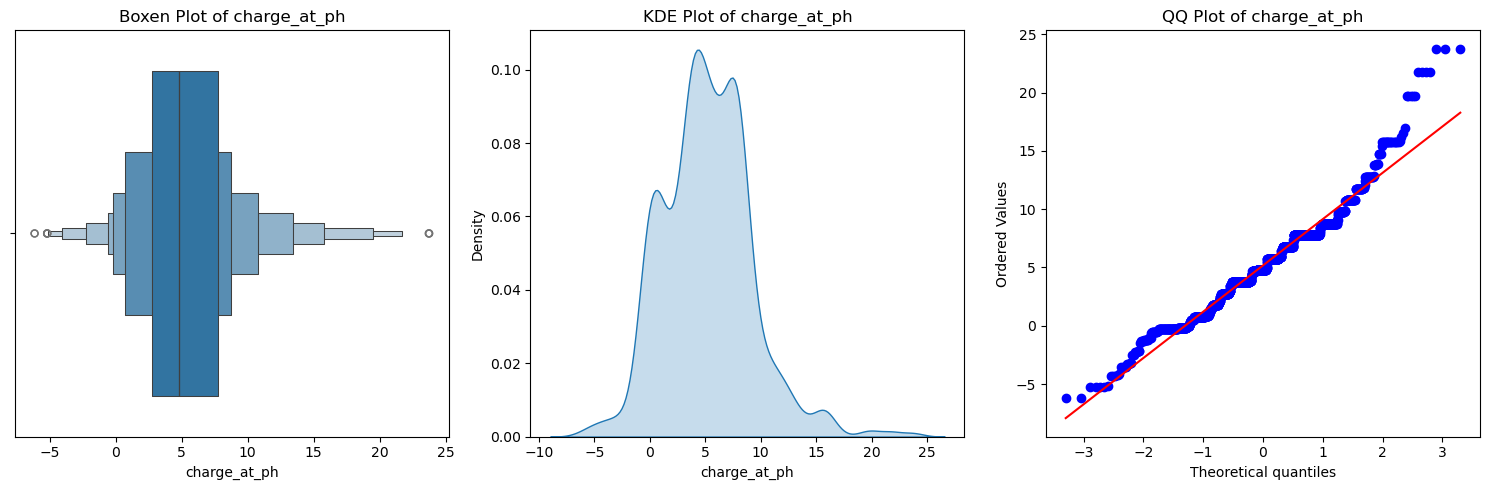

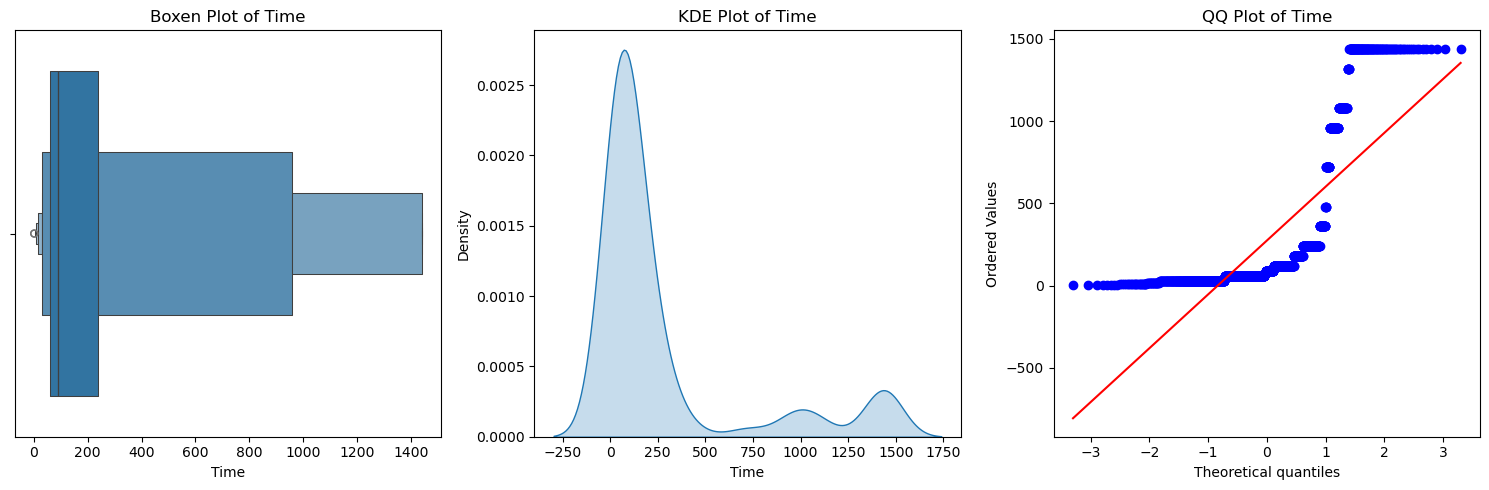

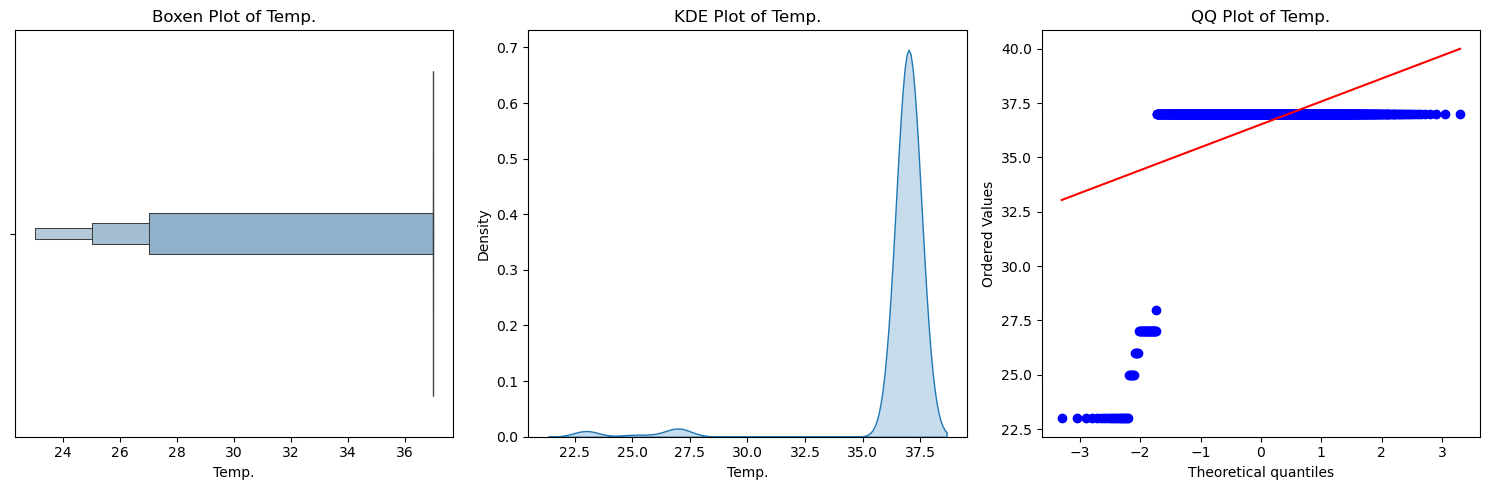

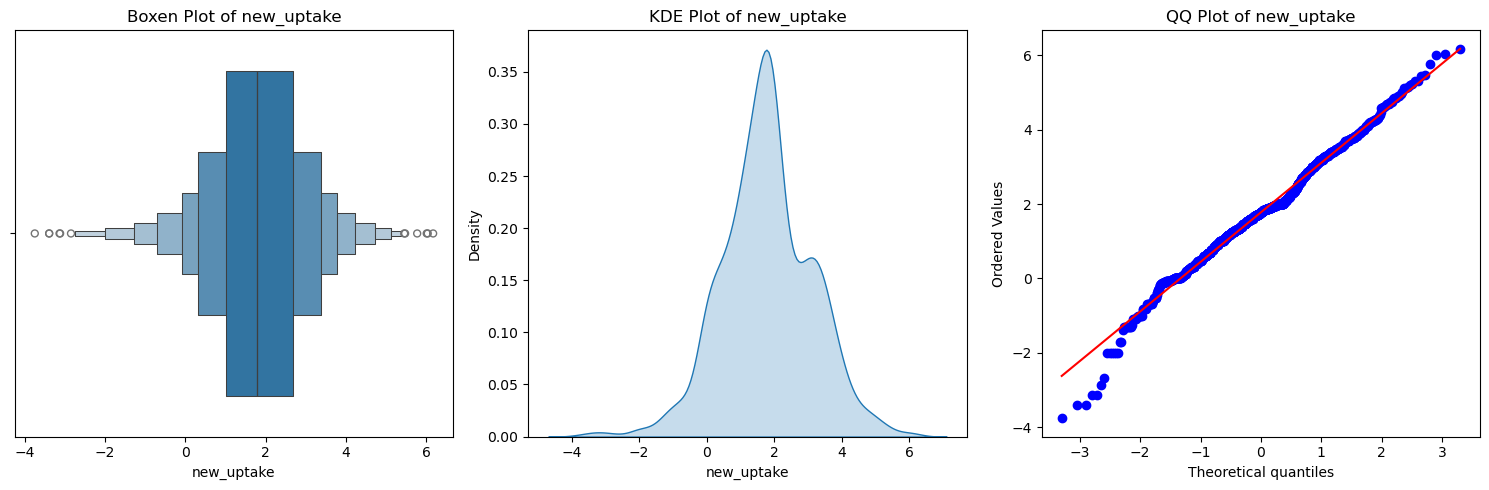

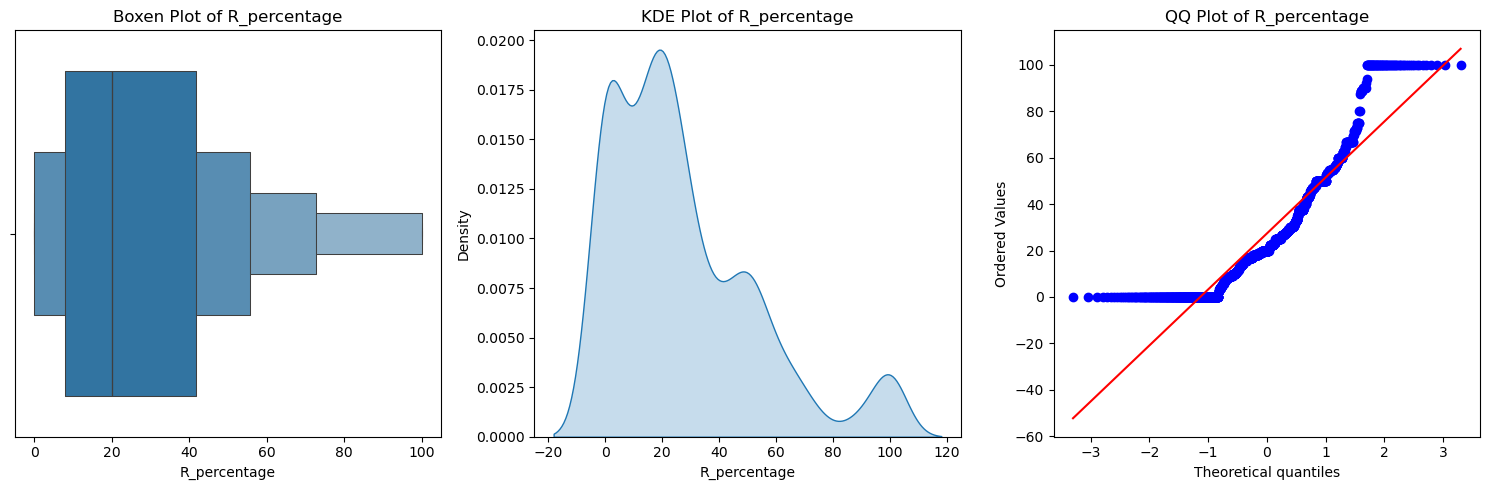

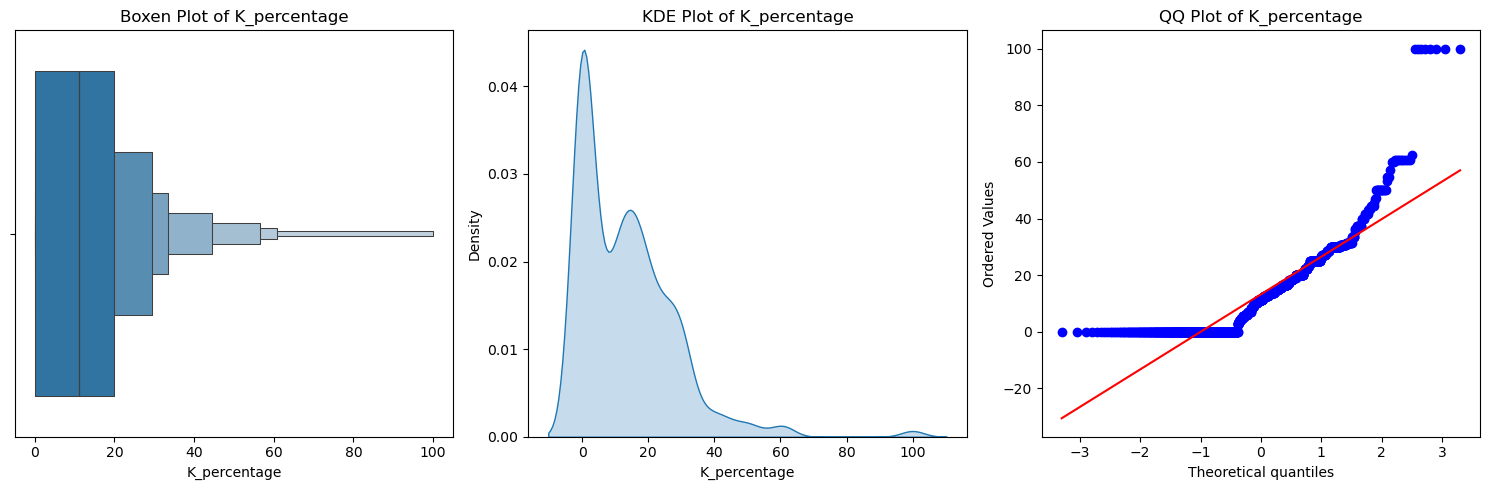

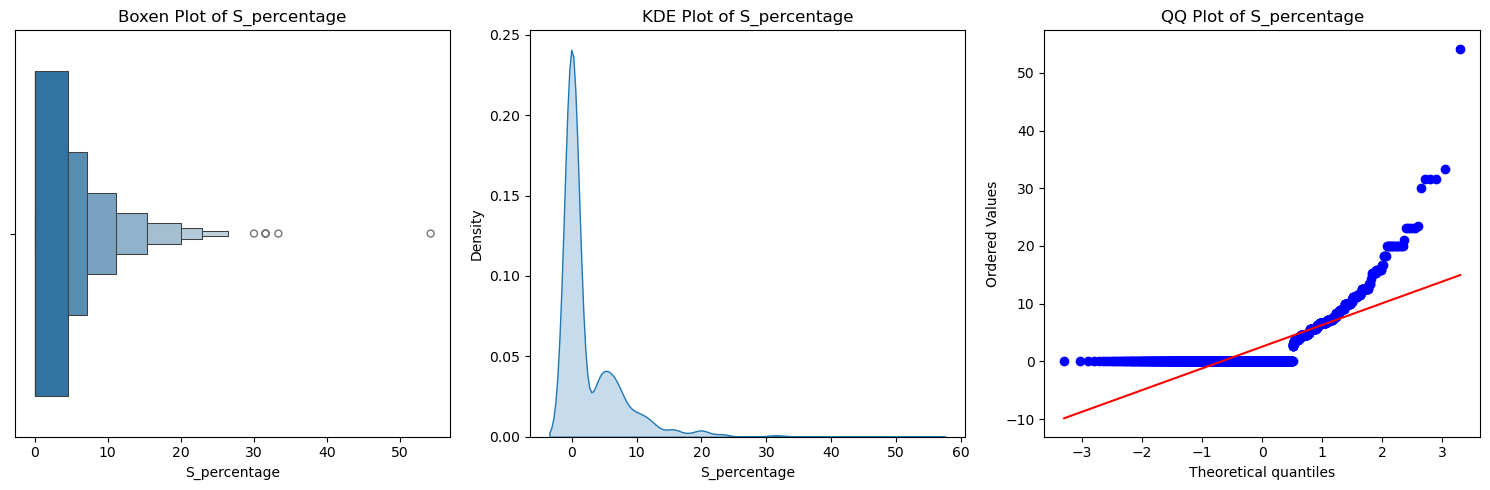

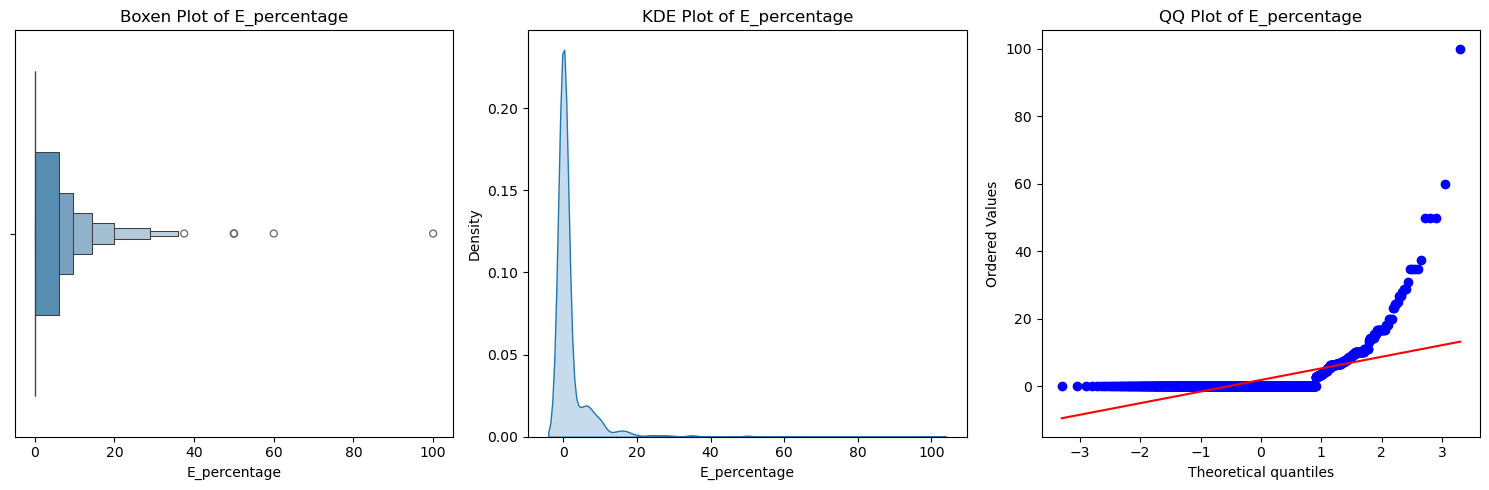

In [34]:
plot_numerical_columns(regresson_df)

In [35]:
len(regresson_df)

1421

In [36]:
regresson_df.to_csv('trimmed_regression.csv')

In [41]:
regresson_df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523],
      dtype='int64', length=1421)

In [42]:
large_no_conc_basic_features.index

RangeIndex(start=0, stop=1524, step=1)

In [43]:
full_df = large_no_conc_basic_features.reindex(regresson_df.index)
full_df

,Unnamed: 0,cleaned_sequence,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_SecondaryStrC1,_SecondaryStrC2,...,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,sequence,charge_at_ph,sequence_len
0,0,RKKRRQRRR,0.0,0.111,0.889,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.222222,0.0,0.0,0,0,-4.255556,RKKRRQRRR,7.758044,9
1,1,RKKRRQRR,0.0,0.125,0.875,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.250000,0.0,0.0,0,0,-4.225000,RKKRRQRR,6.758054,8
2,2,RKKRRQR,0.0,0.143,0.857,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.285714,0.0,0.0,0,0,-4.185714,RKKRRQR,5.758064,7
3,3,KKRRQRRR,0.0,0.125,0.875,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.250000,0.0,0.0,0,0,-4.225000,KKRRQRRR,6.758054,8
4,4,KRRQRRR,0.0,0.143,0.857,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.142857,0.0,0.0,0,0,-4.271429,KRRQRRR,5.759053,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1519,RRHRHRHRHR,0.0,0.000,1.000,0.0,0.600,0.400,1.0,0.0,...,11.999968,0.000000,0.0,0.0,0,0,-3.980000,RRHRHRHRHR,6.108738,10
1520,1520,RRRHRHRHRHR,0.0,0.000,1.000,0.0,0.636,0.364,1.0,0.0,...,11.999968,0.000000,0.0,0.0,0,0,-4.027273,RRRHRHRHRHR,7.108728,11
1521,1521,RRRRHRHRHRHR,0.0,0.000,1.000,0.0,0.667,0.333,1.0,0.0,...,11.999968,0.000000,0.0,0.0,0,0,-4.066667,RRRRHRHRHRHR,8.108718,12
1522,1522,RRRRRHRHRHRHR,0.0,0.000,1.000,0.0,0.692,0.308,1.0,0.0,...,11.999968,0.000000,0.0,0.0,0,0,-4.100000,RRRRRHRHRHRHR,9.108708,13


In [45]:
full_df.to_csv('full_trimmed_regression.csv')